# Introduction

Analyzing No-show appointments data set. The goal of this project is to clean the data, analyze and visualize the findings.

# Load Packages and Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Ensure the data set is loaded correctly

In [6]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# Data Wrangling

Check data types and structure of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data Cleaning

### Change column names to lower case and replace "-" with "_"

In [9]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Convert patientid and appointmentid to object

In [10]:
df['patientid'] =df['patientid'].astype('object')

In [11]:
df['appointmentid'] =df['appointmentid'].astype('object')

### Remove 'Z' and 'T' from scheduleday and appointmentday columns

In [12]:
df['scheduledday'] = df['scheduledday'].str.replace('Z','').str.replace('T',' ')

In [13]:
df['appointmentday'] = df['appointmentday'].str.replace('Z','').str.replace('T',' ')

### Change datatype of scheduledday and appointmentday to datetime

In [14]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [15]:
df['appointmentday']= pd.to_datetime(df['appointmentday'])

#### Modify the 'no_show' column to get summary statistics easily. Replace 'No' by 0 and 'Yes' by 1.

In [16]:
df['no_show'].replace({'No':0,'Yes':1},inplace = True)

#### Change 'no_show' from 'Object' datatype to 'int'

In [17]:
df['no_show'] =df['no_show'].astype('int')

Ensure changes in dataframe

In [18]:
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.98725e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.58998e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.26296e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int32
dtypes: datetime64[ns](2), int32(1), int64(7), object(4)
memory usage: 11.4+ MB


#### Remove rows where age is negative. 

In [20]:
df_cleaned1 = df.query('age > -1')

#### As the data dictionary on Kaggle website mentions handcap to be boolean, remove all values greater than 1 

In [21]:
#keep rows only less than or equal to 1 (0 or 1)
df_cleaned2 = df_cleaned1.query('handcap <= 1')

#### Write Cleaned data to CSV

In [22]:
df_cleaned2.to_csv('cleaned_data.csv',index = False)

# Exploratory Data Analysis

### Load cleaned data set, check datatypes 

In [23]:
df = pd.read_csv('cleaned_data.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110327 entries, 0 to 110326
Data columns (total 14 columns):
patientid         110327 non-null float64
appointmentid     110327 non-null int64
gender            110327 non-null object
scheduledday      110327 non-null object
appointmentday    110327 non-null object
age               110327 non-null int64
neighbourhood     110327 non-null object
scholarship       110327 non-null int64
hipertension      110327 non-null int64
diabetes          110327 non-null int64
alcoholism        110327 non-null int64
handcap           110327 non-null int64
sms_received      110327 non-null int64
no_show           110327 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


### Change datatype of required columns

In [25]:
#Change datatype of 'patientid' and 'appointmentid' to Object. 

df['patientid'] =df['patientid'].astype('object')
df['appointmentid'] =df['appointmentid'].astype('object')

#Change datatype of 'scheduledday' and 'appointmentday' to date_time. 
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [26]:
df.age.median()

37.0

# Research Questions

## 1. Do younger people have higher no_show rate than older people?

In [27]:
median_age = df['age'].median()
low_age = df.query('age < {}'.format(median_age))
high_age = df.query('age > {}'.format(median_age))

mean_noshow_low = low_age['no_show'].mean()
mean_noshow_high = high_age['no_show'].mean()

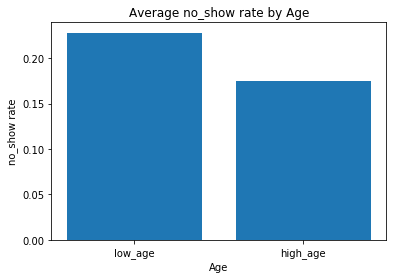

In [28]:
locations = [1,2]
heights = [mean_noshow_low,mean_noshow_high]
labels = ['low_age','high_age']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average no_show rate by Age')
plt.xlabel('Age')
plt.ylabel('no_show rate');

## 2. Does gender influence no show rate?

In [29]:
female = df.query('gender == "F"')
male  = df.query('gender == "M"')

mean_noshow_female = female['no_show'].mean()
mean_noshow_male = male['no_show'].mean()

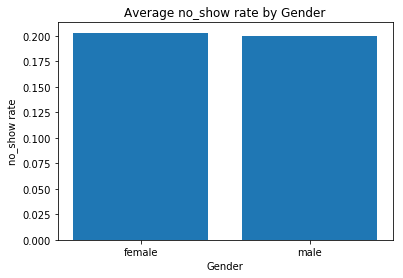

In [30]:
locations = [1,2]
heights = [mean_noshow_female,mean_noshow_male]
labels = ['female','male']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average no_show rate by Gender')
plt.xlabel('Gender')
plt.ylabel('no_show rate');

## 3. Impact of scholarship on no_show

In [31]:
no_scholarship = df.query('scholarship == 0')
with_scholarship  = df.query('scholarship == 1')

mean_noshow_no_scholarship = no_scholarship['no_show'].mean()
mean_noshow_with_scholarship = with_scholarship['no_show'].mean()

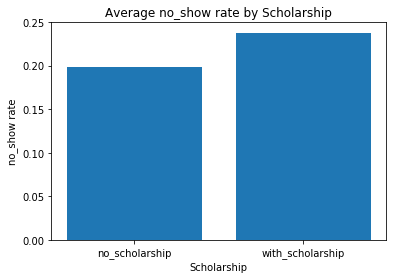

In [32]:
locations = [1,2]
heights = [mean_noshow_no_scholarship,mean_noshow_with_scholarship]
labels = ['no_scholarship','with_scholarship']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average no_show rate by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('no_show rate');

## 4. Which days have higher no_show?

### Add day of the week columns to the dataframe

In [33]:
df['scheduled_day_of_week'] = df['scheduledday'].dt.weekday_name
df['appointment_day_of_week'] = df['appointmentday'].dt.weekday_name

Text(0,0.5,'no_show rate')

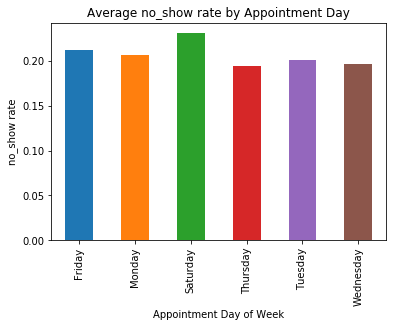

In [34]:
appointmentday_mean = df.groupby('appointment_day_of_week')['no_show'].mean()
appointmentday_mean.plot(kind = 'bar')
plt.title('Average no_show rate by Appointment Day')
plt.xlabel('Appointment Day of Week')
plt.ylabel('no_show rate')

Text(0,0.5,'no_show rate')

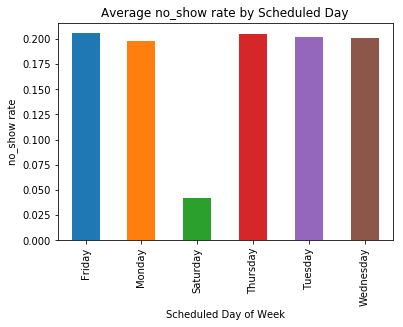

In [35]:
scheduledday_mean = df.groupby('scheduled_day_of_week')['no_show'].mean()
scheduledday_mean.plot(kind = 'bar')
plt.title('Average no_show rate by Scheduled Day')
plt.xlabel('Scheduled Day of Week')
plt.ylabel('no_show rate')

## 5. Which neighbourhood higher no_show rate and which ones are lower?

create a dataframe with only 'neighbourhood' and 'no_show' values

In [36]:
#create a new dataframe with just required columns
df_neighbourhood = df[['neighbourhood','no_show']]

Calculate the average no_show for each neighbourhood.

In [37]:
#Add mean as a new column to the dataframe
mean_no_show = df_neighbourhood.groupby(['neighbourhood'])['no_show'].mean()

df_neighbourhood = df_neighbourhood.set_index('neighbourhood')
df_neighbourhood['mean_no_show'] = mean_no_show
df_neighbourhood = df_neighbourhood.reset_index()
df_neighbourhood.head(3)

,neighbourhood,no_show,mean_no_show
0,JARDIM DA PENHA,0,0.162965
1,JARDIM DA PENHA,0,0.162965
2,MATA DA PRAIA,0,0.171875


High 'no-show' neaighbourhoods have high mean as no_show = 1 means the patient did not show up

### top 10 neighbourhoods with high 'no_show' rate

Text(0,0.5,'no_show rate')

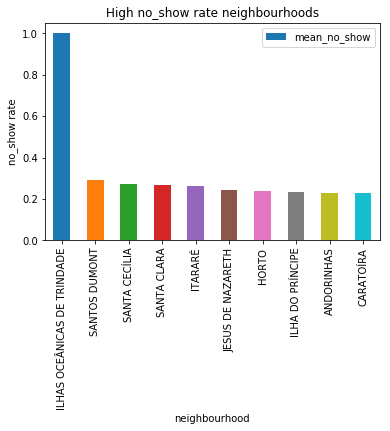

In [38]:
#Group neighbourhood column
df_grouped = df_neighbourhood.groupby('neighbourhood', as_index = False)['mean_no_show'].min()

df_grouped.nlargest(10,'mean_no_show').plot(x = 'neighbourhood',y = 'mean_no_show',kind = 'bar')
plt.title('High no_show rate neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('no_show rate')


### top 10 neighbourhoods with low 'no_show' rate

Text(0,0.5,'no_show rate')

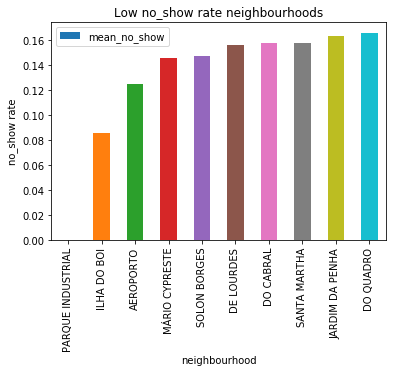

In [386]:
df_grouped.nsmallest(10,'mean_no_show').plot(x = 'neighbourhood',y = 'mean_no_show',kind = 'bar')
plt.title('Low no_show rate neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('no_show rate')

In [389]:
df_grouped.nlargest(10,'mean_no_show')

,neighbourhood,mean_no_show
34,ILHAS OCEÂNICAS DE TRINDADE,1.000000
70,SANTOS DUMONT,0.289639
61,SANTA CECÍLIA,0.274554
62,SANTA CLARA,0.265347
36,ITARARÉ,0.262618
40,JESUS DE NAZARETH,0.243954
28,HORTO,0.240000
33,ILHA DO PRÍNCIPE,0.232846
1,ANDORINHAS,0.230599
9,CARATOÍRA,0.230109


In [169]:
#df2 = df.groupby(level=0).agg({''})
df3 = df.groupby(['neighbourhood', "no_show"]).size()
#df4 = df3.groupby(level=0).agg({'no_show':['size','sum']})
#print(p)
#df_neighbourhood['proportion'] = (100*p/p.groupby(level=0).sum()
df3.head()

neighbourhood    no_show
AEROPORTO        0             7
                 1             1
ANDORINHAS       0          1735
                 1           520
ANTÔNIO HONÓRIO  0           221
dtype: int64

# Number of people showing up and not showing up based on parameters

## Create function to accept parameters and return size

In [66]:
def groupby_parameters(*argv):
    param_list = []
    for arg in argv:
        param_list.append(arg)
    return ( df.groupby(param_list).size())

In [69]:
#Group by handcap and no_show
groupby_parameters('handcap','no_show')

handcap  no_show
0        0          86373
         1          21912
1        0           1676
         1            366
dtype: int64

In [70]:
#Group by alcoholism and no_show
groupby_parameters('alcoholism','no_show')

alcoholism  no_show
0           0          85372
            1          21603
1           0           2677
            1            675
dtype: int64

In [72]:
#Group by diabetes and no_show
groupby_parameters('diabetes','no_show')

diabetes  no_show
0         0          81571
          1          20856
1         0           6478
          1           1422
dtype: int64

In [73]:
#Group by hipertension and no_show
groupby_parameters('hipertension','no_show')

hipertension  no_show
0             0          70081
              1          18530
1             0          17968
              1           3748
dtype: int64

In [74]:
#Group by sms_received
groupby_parameters('sms_received','no_show')

sms_received  no_show
0             0          62389
              1          12503
1             0          25660
              1           9775
dtype: int64

## Analysis by grouping multiple parameters

In [75]:
groupby_parameters('gender','sms_received','no_show')

gender  sms_received  no_show
F       0             0          39698
                      1           7855
        1             0          17464
                      1           6713
M       0             0          22691
                      1           4648
        1             0           8196
                      1           3062
dtype: int64

Determine the no_show rate by the age groups and gender

In [373]:
# 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 
# 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received'
#df2 = df
df2['age_group'] = df.age.apply(lambda x: "0-37" if x < 37 else "37+")
df2.groupby(['age_group','gender', "no_show"]).size().apply(lambda x: x / len(df))


age_group  gender  no_show
0-37       F       0          0.234467
                   1          0.070237
           M       0          0.146854
                   1          0.042437
37+        F       0          0.283648
                   1          0.061807
           M       0          0.133104
                   1          0.027446
dtype: float64

In [81]:
# determine percentage based on the parameters
groupby_parameters('scholarship','sms_received','no_show').apply(lambda x: x / len(df))

scholarship  sms_received  no_show
0            0             0          0.511570
                           1          0.100701
             1             0          0.211580
                           1          0.077869
1            0             0          0.053922
                           1          0.012626
             1             0          0.021001
                           1          0.010732
dtype: float64

### Split the data into two data frames based on 'no_show' column. One for 0 and other for 1

In [59]:
df_yes = df.query('no_show == 0')
df_no  = df.query('no_show == 1')

In [64]:
df_yes.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.98725e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.58998e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.26296e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.67951e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.84119e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### Plot the distribution of 'age' in both data frames

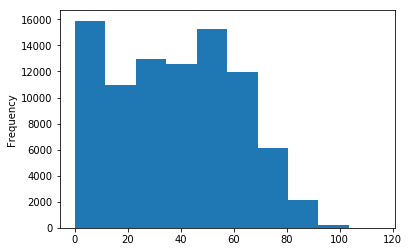

In [169]:
df_no['age'].plot(kind = 'hist')

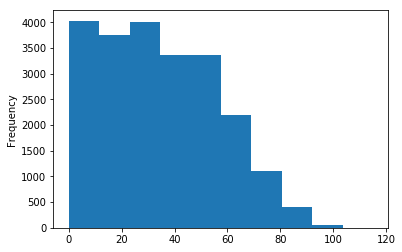

In [170]:
df_yes['age'].plot(kind = 'hist')

In [361]:
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week
0,2.98725e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,5.58998e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,4.26296e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday


In [362]:
df_yes.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.98725e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.58998e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0


# Conclusions

Here are the conclusions that can be made from the analysis:
    1. People who are older than 37 years of age have lower no-show rate.
    2. Men and women have very similar no-show rate.
    3. Patients without scholarship have lower no-show rate.
    4. Patients who schedule appointment on saturday have lower no-show rate.
    5. Patients who have scheduled appointments on satueday have high no-show rate.
    6. PARQUE INDUSTRIAL has 0% no-show rate.
    7. ILHAS OCEÂNICAS DE TRINDADE has 100% no-show rate.
    8. Patients who have no scholarship and not received SMS have lower no-show rate.
    9. The histogram of age group for the ones who did not show up and actually showed up is similar.

Limitations:
    1. The analysis does not include any statistical inferences. Logistic regression and other mathematical models will be developed after progressing in the course.
    2. The top 10 neighbourhoods with high no show rate have fewer people than others. Example, ILHAS OCEÃ‚NICAS DE TRINDADE which has 100% no show rate has only 2 entries. 
    3. All the entries where handcapped > 1 is removed, 200 rows are deleted.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0